In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
hr_grad = np.load('C:/Users/17175/Documents/Gradient_Refinement_GAN/Random_Surfaces/func_3.npy')

<IPython.core.display.Javascript object>


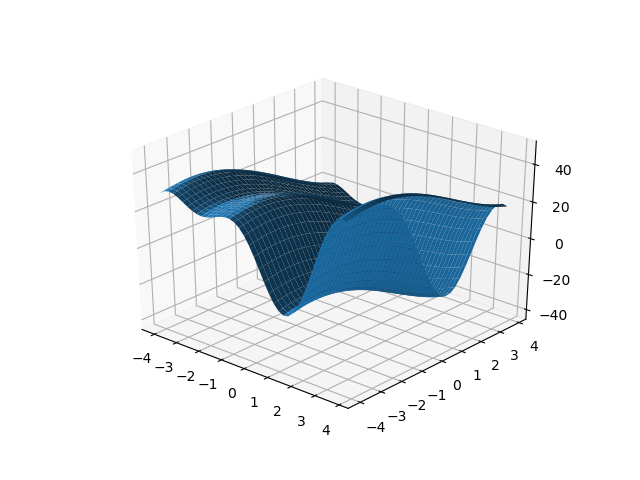

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = hr_grad[0]
y = hr_grad[1]
z = hr_grad[2]
dx = hr_grad[3]
dy = hr_grad[4]
dz = np.zeros_like(dx)
surf = ax.plot_surface(x, y, z, linewidth=0)
plt.show()

<IPython.core.display.Javascript object>


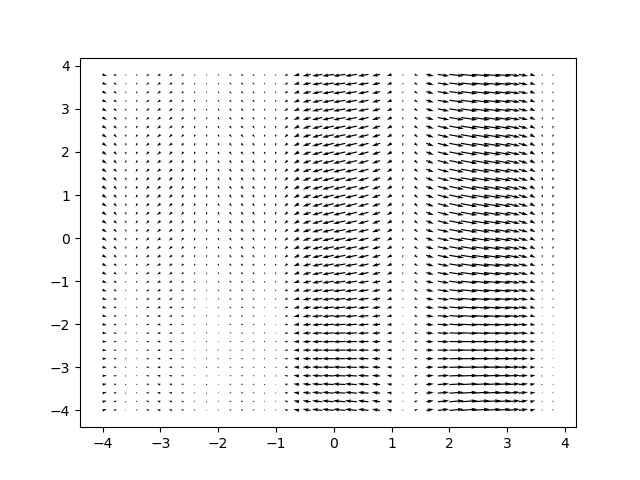

In [4]:
fig1, ax1 = plt.subplots()
grad = ax1.quiver(x, y, dx, dy)
plt.show()

In [5]:
down_x = x[::4, ::4]
down_y = y[::4, ::4]
down_z = z[::4, ::4]
down_dx = dx[::4, ::4]
down_dy = dy[::4, ::4]
down_dz = dz[::4, ::4]
print(down_dz.shape)

(10, 10)


<IPython.core.display.Javascript object>


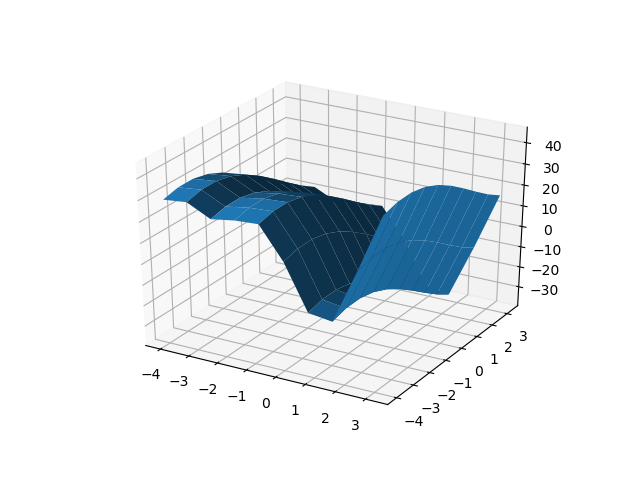

In [6]:
fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
surf1 = ax2.plot_surface(down_x, down_y, down_z, linewidth=0)
plt.show()

<IPython.core.display.Javascript object>


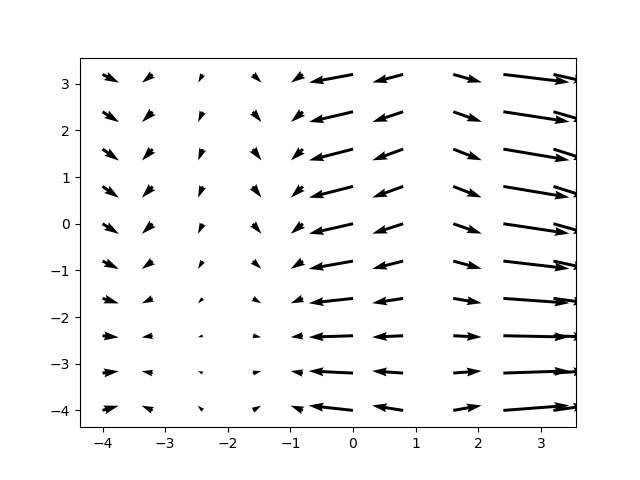

In [7]:
fig3, ax3 = plt.subplots()
grad = ax3.quiver(down_x, down_y, down_dx, down_dy)
plt.show()

In [8]:
lr_grad = np.array([down_x, down_y, down_z, down_dx, down_dy], dtype=np.float32)

In [9]:
print(hr_grad.shape)
print(lr_grad.shape)

(5, 40, 40)
(5, 10, 10)


In [10]:
print(hr_grad.shape)
lr_grad = np.array([comp[::4, ::4] for comp in hr_grad])
print(lr_grad.shape)

(5, 40, 40)
(5, 10, 10)


<IPython.core.display.Javascript object>


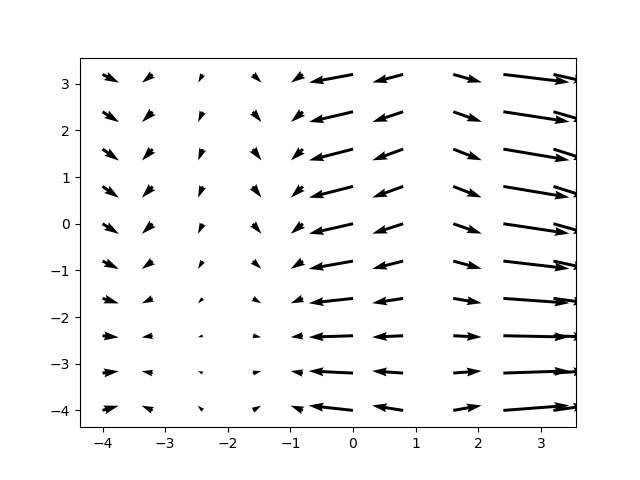

In [11]:
fig3, ax3 = plt.subplots()
grad = ax3.quiver(lr_grad[0], lr_grad[1], lr_grad[3], lr_grad[4])

In [12]:
print(lr_grad[-2:].shape)

(2, 10, 10)


In [13]:
import sys
import torch

In [14]:
sys.path.append("C:/Users/17175/Documents/Gradient_Refinement_GAN/models")

In [15]:
from generator import Generator

In [16]:
gen = Generator()
print(torch.from_numpy(lr_grad[-2:]).shape)
gen(torch.unsqueeze(torch.from_numpy(lr_grad[-2:]),0)).shape

torch.Size([2, 10, 10])


torch.Size([1, 2, 40, 40])